In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


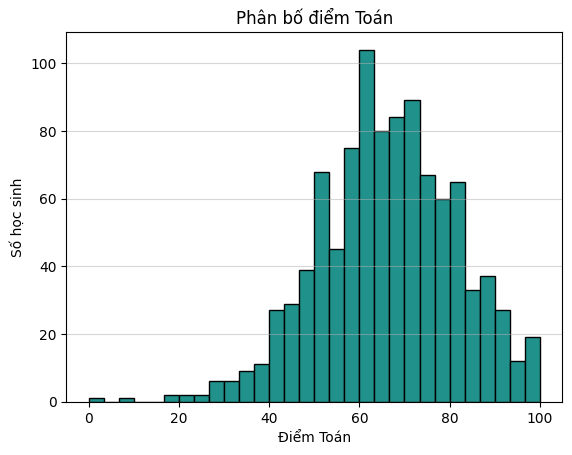

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

color = cm.viridis(0.5)
# color = cm.coolwarm(0.7)
plt.hist(data["math score"], bins=30, color=color, edgecolor="black")
plt.title("Phân bố điểm Toán")
plt.xlabel("Điểm Toán")
plt.ylabel("Số học sinh")
plt.grid(axis='y', alpha=0.5)
plt.show()



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23100\2629242507.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([math_male, math_female],


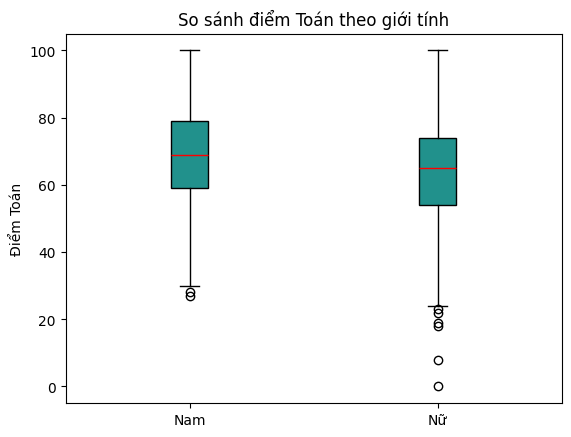

3      47
4      76
7      40
8      64
10     58
       ..
985    57
987    81
990    86
994    63
996    62
Name: math score, Length: 482, dtype: int64

In [6]:
import matplotlib.pyplot as plt

# Tách dữ liệu theo giới tính
math_male = data[data["gender"] == "male"]["math score"]
math_female = data[data["gender"] == "female"]["math score"]

# Vẽ boxplot bằng matplotlib
plt.boxplot([math_male, math_female],
            labels=["Nam", "Nữ"],
            patch_artist=True,  # tô màu hộp
            boxprops=dict(facecolor=color, color="black"),
            medianprops=dict(color="red"))

plt.title("So sánh điểm Toán theo giới tính")
plt.ylabel("Điểm Toán")
plt.show()

math_male 


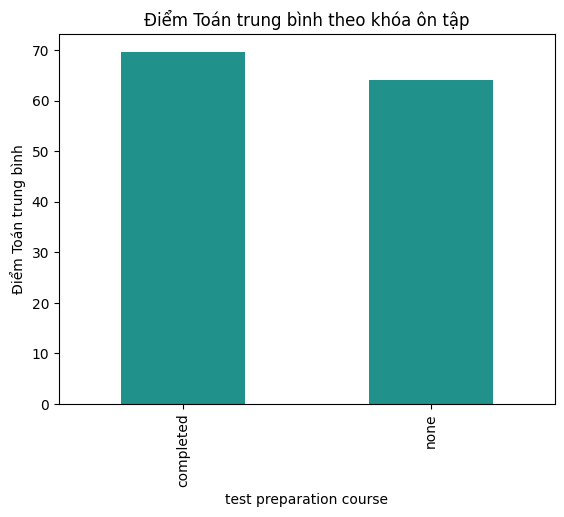

In [7]:
data.groupby("test preparation course")["math score"].mean().plot(kind="bar", color=color)
plt.title("Điểm Toán trung bình theo khóa ôn tập")
plt.ylabel("Điểm Toán trung bình")
plt.show()



#### Diem cua Group E cao nhat

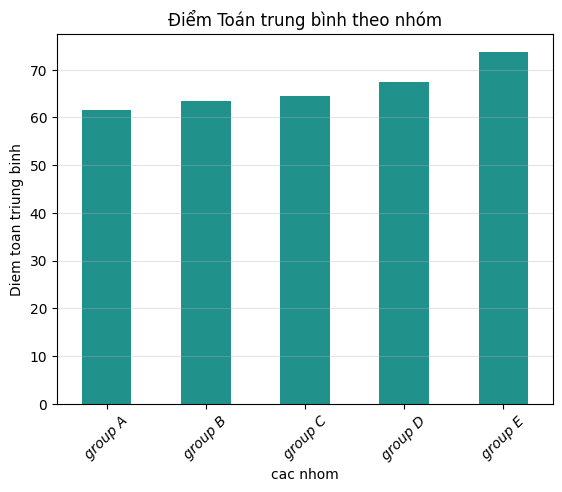

In [8]:
data.groupby("race/ethnicity")["math score"].mean().plot(kind="bar", color=color)
plt.title("Điểm Toán trung bình theo nhóm")
plt.ylabel("Diem toan triung binh")
plt.xlabel("cac nhom")
plt.grid(axis='y', alpha=0.34)
plt.xticks(rotation=45, fontstyle='italic')
# plt.ylim(0, 100)
plt.show()

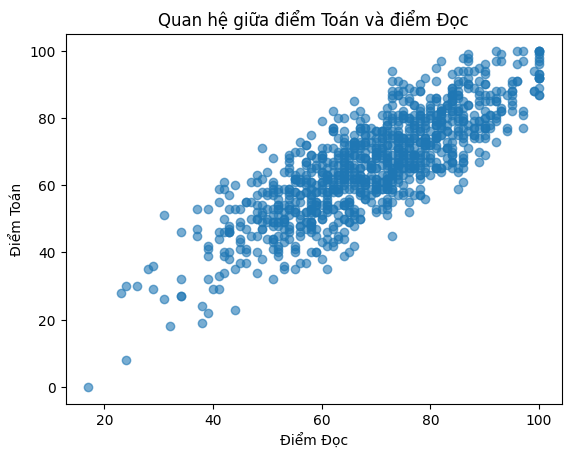

In [9]:
plt.scatter(data["reading score"], data["math score"], alpha=0.6)
plt.title("Quan hệ giữa điểm Toán và điểm Đọc")
plt.xlabel("Điểm Đọc")
plt.ylabel("Điểm Toán")
plt.show()


In [10]:
import seaborn as sns

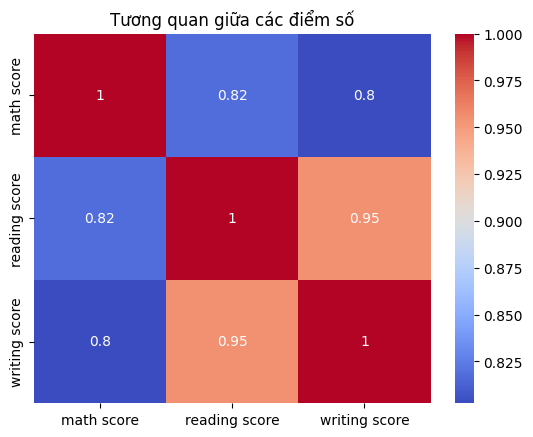

In [11]:
sns.heatmap(data[["math score","reading score","writing score"]].corr(), annot=True, cmap="coolwarm", color=color)
plt.title("Tương quan giữa các điểm số")
plt.show()


In [12]:
data.describe(include='all')  # Thống kê mô tả các cột số

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [13]:
data.isnull().sum()  # Kiểm tra số lượng giá trị thiếu trong mỗi cột


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
data = data.drop(columns=["parental level of education"], axis = 1) # Loại bỏ cột không cần thiết

In [15]:
from sklearn.model_selection import train_test_split

X_data = data.drop(columns=['math score'], axis=1)
y_data = data['math score']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42,shuffle= True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42,shuffle= True)


In [16]:
y_test.shape

(200,)

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Xây dựng bộ tiền xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features) ])

# Xây dựng pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Bước tiền xử lý
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Mô hình RandomForest
])

# Huấn luyện mô hình
model_pipeline.fit(X_train, y_train)

# Du doan 
y_predict = model_pipeline.predict(X_test)

y_predict = pd.DataFrame(y_predict, columns=['Dự đoán'])
y_test = pd.DataFrame(y_test).reset_index(drop=True)
# y_test = pd.dataFrame(y_test).reset_index(drop=True)


result = pd.concat([y_test, y_predict], axis=1)
print(result.head(20))



    math score  Dự đoán
0           91  70.8300
1           53  56.5000
2           80  78.4100
3           74  78.7200
4           84  82.2000
5           81  84.9225
6           69  69.1100
7           54  55.5500
8           87  73.9800
9           51  50.2700
10          45  51.1900
11          30  33.7400
12          67  66.5300
13          49  49.6700
14          85  80.4900
15          65  70.5500
16          53  45.6700
17          55  47.8600
18          48  50.5100
19          56  49.0300


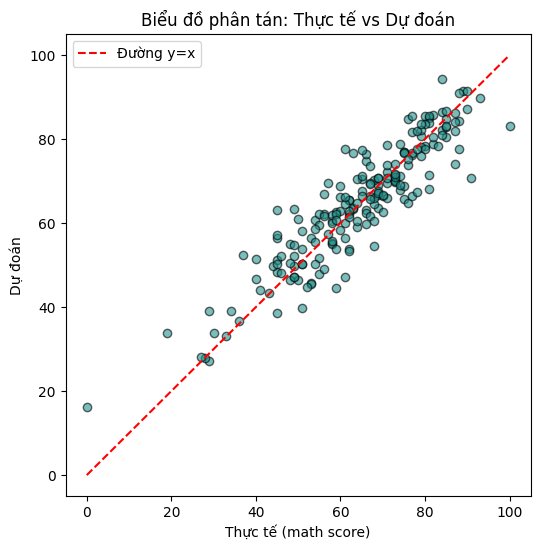

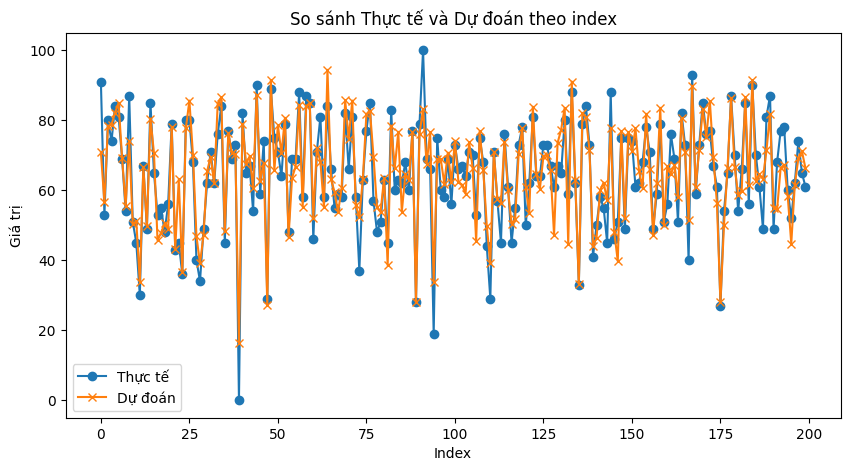

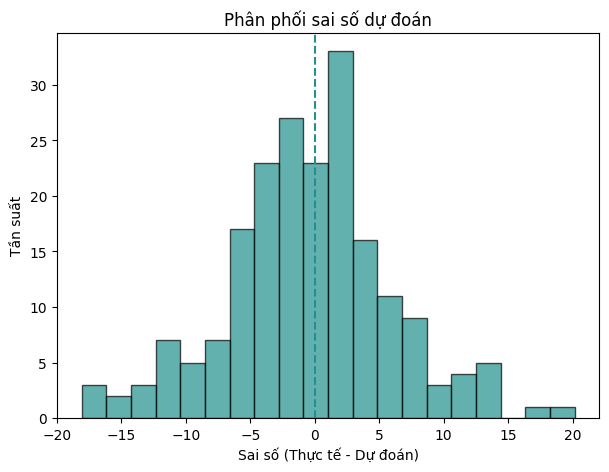

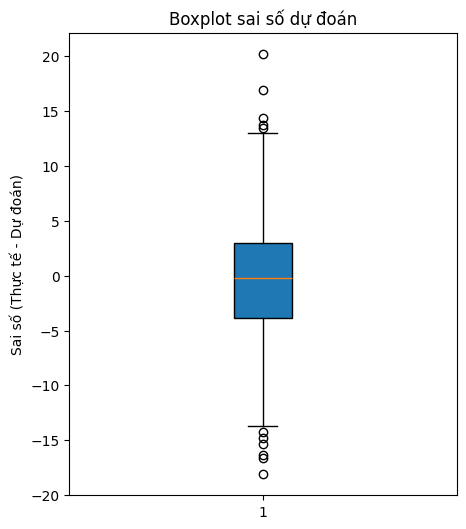

In [18]:

# Scatter plot: Thực tế vs Dự đoán
plt.figure(figsize=(6,6))
plt.scatter(result["math score"], result["Dự đoán"], alpha=0.6, edgecolor="k", color=color)
plt.plot([result["math score"].min(), result["math score"].max()],
         [result["math score"].min(), result["math score"].max()],
         color="red", linestyle="--", label="Đường y=x")
plt.xlabel("Thực tế (math score)")
plt.ylabel("Dự đoán")
plt.title("Biểu đồ phân tán: Thực tế vs Dự đoán")
plt.legend()
plt.show()

# Line plot: So sánh theo index
plt.figure(figsize=(10,5))
plt.plot(result.index, result["math score"], label="Thực tế", marker="o")
plt.plot(result.index, result["Dự đoán"], label="Dự đoán", marker="x")
plt.xlabel("Index")
plt.ylabel("Giá trị")
plt.title("So sánh Thực tế và Dự đoán theo index")
plt.legend()
plt.show()

# Histogram: Sai số (Residuals)
residuals = result["math score"] - result["Dự đoán"]

plt.figure(figsize=(7,5))
plt.hist(residuals, bins=20, edgecolor="black", alpha=0.7, color=color)
plt.axvline(x=0, color=color, linestyle="--")
plt.xlabel("Sai số (Thực tế - Dự đoán)")
plt.ylabel("Tần suất")
plt.title("Phân phối sai số dự đoán")
plt.show()

# Boxplot: Sai số
plt.figure(figsize=(5,6))
plt.boxplot(residuals, vert=True, patch_artist=True)
plt.ylabel("Sai số (Thực tế - Dự đoán)")
plt.title("Boxplot sai số dự đoán")
plt.show()


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Tính MSE và R²
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R²: {r2}')


Mean Squared Error (MSE): 40.89551385582483
R²: 0.8319397437649593


##### Đánh giá ngay trên validation

In [20]:
y_val_pred = model_pipeline.predict(X_val)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation MSE:", mse_val)
print("Validation R²:", r2_val)


Validation MSE: 38.20137289711451
Validation R²: 0.8234585859027296


In [21]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_grid = {
    'regressor__n_estimators': [100, 200, 300],                 #số lượng cây trong rừng
    'regressor__max_features': ['auto', 'sqrt', 'log2'],        #số lượng đặc trưng được chọn ngẫu nhiên
    'regressor__min_samples_split': [2, 5, 10],                  #số mẫu tối thiểu để chia một nút
    'regressor__min_samples_leaf': [1, 2, 4]                     #số mẫu tối thiểu trong một lá
}

In [22]:
search_grid = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1,
    refit=True
)

search_grid.fit(X_train, y_train)

print("Best params:", search_grid.best_params_)

y_val_pred = search_grid.predict(X_val)
print("VAL RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))
print("VAL R2:", r2_score(y_val, y_val_pred))

best_pipe = search_grid.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best params: {'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}
VAL RMSE: 6.071167683347893
VAL R2: 0.8296617872774233


c:\Users\ADMIN\anaconda3\envs\gradio_env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
81 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADMIN\anaconda3\envs\gradio_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ADMIN\anaconda3\envs\gradio_env\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ADMIN\anaconda3\envs\gradio_env\Lib\site-packages\skl

#### Bây giờ tớ sẽ gộp tập train test lại và chạy lại Modle một lần nữa nhằm tối đa hóa bộ data huấn luyện mô hình này


In [23]:
X_train_full = pd.concat([X_train, X_val], axis=0)
y_train_full = pd.concat([y_train, y_val], axis=0)

best_pipe.fit(X_train_full, y_train_full)
y_test_pred = best_pipe.predict(X_test)


In [24]:
print("TEST MSE:", mean_squared_error(y_test, y_test_pred))
print("TEST RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("TEST MAE:", mean_absolute_error(y_test, y_test_pred))
print("TEST R²:", r2_score(y_test, y_test_pred))

TEST MSE: 40.61514417557392
TEST RMSE: 6.373001190614507
TEST MAE: 4.820501637112886
TEST R²: 0.8330919239397732


In [25]:
y_test_pred = pd.DataFrame(y_test_pred, columns=['Dự đoán'])
y_test = pd.DataFrame(y_test).reset_index(drop=True)

result_final = pd.concat([y_test, y_test_pred], axis=1)
print(result_final.head(20))

    math score    Dự đoán
0           91  77.289984
1           53  56.580561
2           80  77.388982
3           74  75.649127
4           84  85.590688
5           81  75.958294
6           69  66.732611
7           54  54.469123
8           87  72.037325
9           51  56.548298
10          45  52.682048
11          30  50.570667
12          67  67.441821
13          49  53.223853
14          85  81.546774
15          65  70.238794
16          53  46.768044
17          55  49.444813
18          48  51.829980
19          56  54.495214


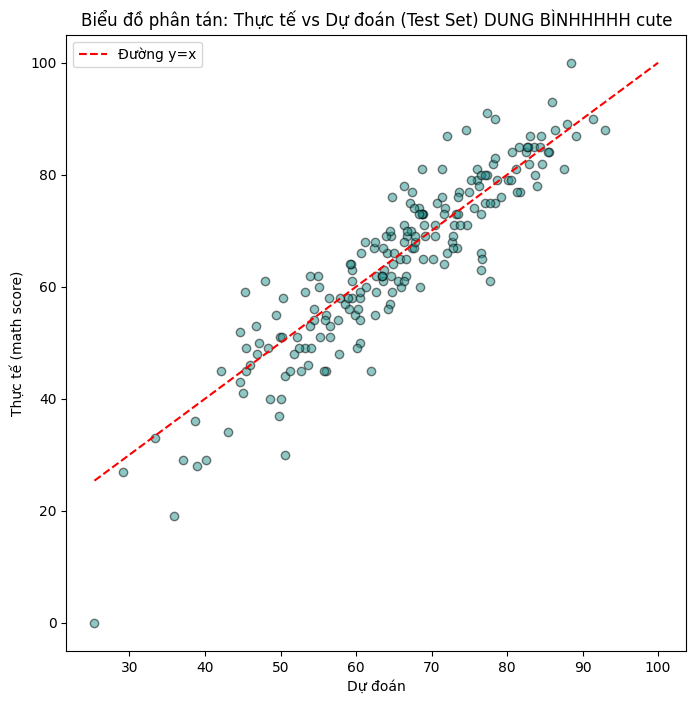

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(result_final['Dự đoán'], result_final['math score'], alpha=0.5, edgecolor="k", color=color)
plt.plot([result_final['Dự đoán'].min(), result_final['math score'].max()],
         [result_final['Dự đoán'].min(), result_final['math score'].max()], color='red', linestyle = '--', label="Đường y=x")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế (math score)")
plt.title("Biểu đồ phân tán: Thực tế vs Dự đoán (Test Set) DUNG BÌNHHHHH cute")
plt.legend()
plt.show()


### --Đề xuất bước tiếp theo--

#### Phân tích residuals
#### Xem mô hình thường dự đoán sai ở điểm thấp, điểm cao hay ở nhóm nào.

#### So sánh thêm mô hình
#### Thử XGBoost/LightGBM, đôi khi sẽ cải thiện thêm vài % R².

#### Feature importance
#### Xem đặc trưng nào ảnh hưởng nhiều nhất, để giải thích mô hình.


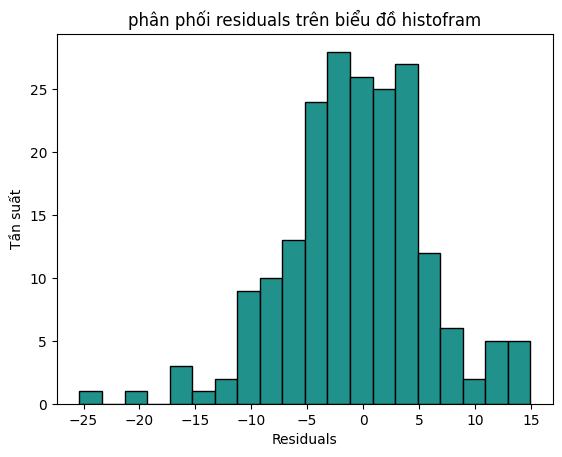

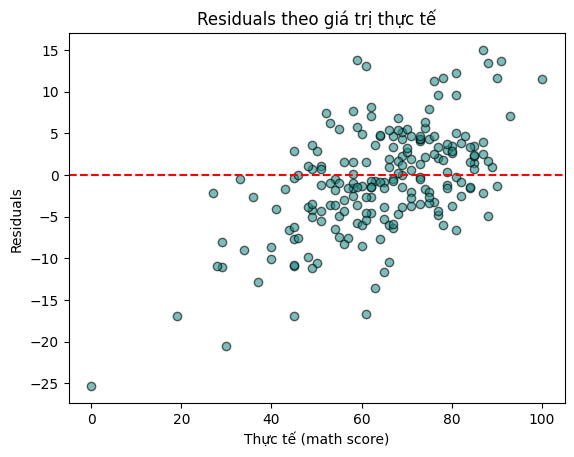

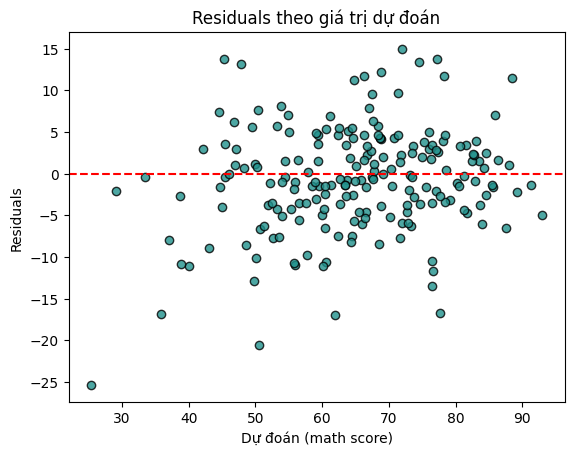

In [27]:
residuals = result_final['math score'] - result_final['Dự đoán']

plt.hist(residuals, bins=20, color=color, edgecolor='black')
plt.title("phân phối residuals trên biểu đồ histofram")
plt.xlabel("Residuals")
plt.ylabel("Tần suất")
plt.show()

plt.scatter(result_final['math score'], residuals, alpha=0.6, edgecolor="k", color=color)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Thực tế (math score)")
plt.ylabel("Residuals")
plt.title("Residuals theo giá trị thực tế")
plt.show()

plt.scatter(result_final['Dự đoán'], residuals, alpha=0.8, edgecolor="k", color=color)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Dự đoán (math score)")
plt.ylabel("Residuals")
plt.title("Residuals theo giá trị dự đoán")
plt.show()


####
Phần lớn residuals nằm trong khoảng -10 đến +10 → mô hình dự đoán khá ổn định.

Trung tâm phân phối gần 0 → mô hình không có thiên lệch mạnh (bias).

Vẫn có một số giá trị ngoại lệ (outliers), ví dụ residual ≈ -25 (mô hình dự đoán cao hơn thực tế ~25 điểm).
####

In [28]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#pipeline cua xgboost
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Bước tiền xử lý
    ('regressor', XGBRegressor(n_estimators=100, random_state=42))  # Mô hình XGBoost
])

#pipeline cua lightgbm
lightgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Bước tiền xử lý
    ('regressor', LGBMRegressor(n_estimators=100, random_state=42))  # Mô hình LightGBM
])

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(pipe, X_train, y_train, X_val, y_val, name="Model"):
    pipe.fit(X_train, y_train)
    y_val_pred = pipe.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    print(f"{name} → MSE={mse:.2f}, RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.4f}")

# Đánh giá trên validation
evaluate_model(xgboost_pipeline, X_train, y_train, X_val, y_val, "XGBoost")
evaluate_model(lightgbm_pipeline, X_train, y_train, X_val, y_val, "LightGBM")


XGBoost → MSE=50.37, RMSE=7.10, MAE=5.81, R²=0.7672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 13
[LightGBM] [Info] Start training from score 66.555000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

c:\Users\ADMIN\anaconda3\envs\gradio_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [30]:
import joblib
joblib.dump(best_pipe, "math_score_best_pipe.pkl")


['math_score_best_pipe.pkl']

In [31]:
pip install --upgrade gradio


Note: you may need to restart the kernel to use updated packages.


In [32]:
import gradio as gr
import pandas as pd
import joblib
import numpy as np
import tempfile

# 1) Load model cuối cùng
pipe = joblib.load("math_score_best_pipe.pkl")

# 2) Hàm dự đoán 1 học sinh
def predict_single(gender, race, parent_edu, lunch, prep, reading, writing):
    row = {
        "gender": gender,
        "race/ethnicity": race,
        "parental level of education": parent_edu,
        "lunch": lunch,
        "test preparation course": prep,
        "reading score": reading,
        "writing score": writing,
    }
    df = pd.DataFrame([row])
    y_pred = pipe.predict(df)[0]
    return float(np.round(y_pred, 2))

# 3) Hàm dự đoán theo CSV
# CSV phải có các cột đầu vào giống lúc train
# Có thể có hoặc không có cột "math score"
def predict_csv(file):
    df = pd.read_csv(file.name)
    X = df.drop(columns=["math score"], errors="ignore")
    preds = pipe.predict(X)
    out = df.copy()
    out["math score predicted"] = np.round(preds, 2)

    # cho phép tải kết quả về
    tmp = tempfile.NamedTemporaryFile(delete=False, suffix=".csv")
    out.to_csv(tmp.name, index=False, encoding="utf-8")
    return out, tmp.name

with gr.Blocks(title="Math Score Predictor", theme = gr.themes.Soft()) as demo:
    gr.Markdown(
        """
        ## Dự đoán Math score
        Nhập thông tin học sinh hoặc tải CSV theo đúng tên cột. 
        Mô hình dùng pipeline đã huấn luyện nên không cần tự xử lý mã hóa.
        """
    )

    with gr.Tab("Dự đoán 1 học sinh"):
        with gr.Row():
            gender = gr.Dropdown(["female", "male"], label="gender", value="female")
            race = gr.Dropdown(
                ["group A", "group B", "group C", "group D", "group E"],
                label="race/ethnicity",
                value="group B",
            )
            parent = gr.Dropdown(
                [
                    "some high school",
                    "high school",
                    "some college",
                    "associate's degree",
                    "bachelor's degree",
                    "master's degree",
                ],
                label="parental level of education",
                value="some college",
            )
        with gr.Row():
            lunch = gr.Dropdown(["standard", "free/reduced"], label="lunch", value="standard")
            prep = gr.Dropdown(["none", "completed"], label="test preparation course", value="none")
        with gr.Row():
            reading = gr.Slider(0, 100, value=70, step=1, label="reading score")
            writing = gr.Slider(0, 100, value=70, step=1, label="writing score")

        btn = gr.Button("Dự đoán")
        out_single = gr.Number(label="Math score dự đoán")

        btn.click(
            predict_single,
            inputs=[gender, race, parent, lunch, prep, reading, writing],
            outputs=out_single,
        )

    with gr.Tab("Dự đoán theo CSV"):
        gr.Markdown(
            """
            CSV cần các cột:
            gender, race/ethnicity, parental level of education, lunch, test preparation course, reading score, writing score.
            Có thể kèm thêm math score để so sánh sau khi dự đoán.
            """
        )
        file_in = gr.File(label="Tải CSV dữ liệu vào")
        btn_csv = gr.Button("Chạy dự đoán CSV")
        out_df = gr.Dataframe(label="Kết quả")
        out_file = gr.File(label="Tải file kết quả")

        btn_csv.click(predict_csv, inputs=file_in, outputs=[out_df, out_file])

demo.launch(share = True)




c:\Users\ADMIN\anaconda3\envs\gradio_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


#### Lưu ý quan trọng

Tên cột phải khớp đúng như lúc bạn train. Ở dataset của bạn có dấu gạch chéo trong "race/ethnicity" và có khoảng trắng trong nhiều cột, giữ y nguyên.

Nếu lúc build pipeline bạn dùng OneHotEncoder(handle_unknown="ignore") thì khi gặp giá trị mới app vẫn chạy an toàn.

Nếu bạn thấy dự đoán lệch nhiều với một vài nhóm, có thể bổ sung tab phân tích sai số sau khi upload CSV.



In [33]:
pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tempfile (from versions: none)
ERROR: No matching distribution found for tempfile
